In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import quantumpropagator as qp
from quantumpropagator import readWholeH5toDict, abs2
#from __future__ import print_function
from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets


In [2]:
subfolders = sorted([ dir for dir in os.listdir('.') if os.path.isdir(dir) and dir != '.ipynb_checkpoints'])
print(''.join(['{} -> {}\n'.format(a,b) for a,b in enumerate(subfolders)]))

0 -> aaa_input_FinerGrid_0027
1 -> aaa_input_FinerGrid_0031
2 -> bbb_finerfinergrid_exploding
3 -> bbb_finergrid_3d_withoutpotential
4 -> distort_input_FinerGrid_0000
5 -> distort_input_FinerGrid_0001
6 -> distort_input_FinerGrid_0002
7 -> newLast3dScan_0000
8 -> newLast3dScan_0001
9 -> newLast3dScan_0002
10 -> newLast3dScan_0003
11 -> newLast3dScan_0004
12 -> newLast3dScan_0005
13 -> newLast3dScan_0006
14 -> newLast3dScan_0007
15 -> newLast3dScan_0008
16 -> newLast3dScan_0009
17 -> newLast3dScan_0010
18 -> newLast3dScan_0011
19 -> newLast3dScan_0012



In [3]:
interactive = True
a = subfolders[-1]
#a = subfolders[4]

In [4]:
filesList = [ fn for fn in sorted(os.listdir(a)) if fn[:8] == 'Gaussian' and fn[-3:] == '.h5']
outh5 = os.path.join(a,'allInput.h5')
dictio = readWholeH5toDict(outh5)
kind = dictio['kind']
phis,gams,thes = dictio['phis'],dictio['gams'],dictio['thes']
lastV = len(filesList)-1

In [5]:
kind

'Phi'

# 1d slices

In [6]:
filesN = len(filesList)
dime,nstates = (qp.retrieve_hdf5_data(os.path.join(a,filesList[0]),'WF')).shape
allwf = np.empty((filesN,dime,nstates),dtype=complex)
alltime = np.empty((filesN))
if kind == 'Phi':
    dim = phis
elif kind == 'Gam':
    dim = gams
elif kind == 'The':
    dim = thes

In [7]:
for i,fn in enumerate(filesList):
    fnn = os.path.join(a,fn)
    allwf[i] = qp.retrieve_hdf5_data(fnn,'WF')
    alltime[i] = qp.retrieve_hdf5_data(fnn,'Time')[0]
    

In [8]:
outfn = os.path.join(a,'output')
outfnP = os.path.join(a,'outputPopul')
data = pd.read_csv(outfn, delim_whitespace=True, header=None);
dataP = pd.read_csv(outfnP, delim_whitespace=True, header=None);
data.columns = ['count','steps','fs','Norm Deviation','Kinetic','Potential','Total','Total deviation','Xpulse','Ypulse','Zpulse']
result = pd.concat([data, dataP], axis=1)

In [9]:
def plotDim1D(i,magni):
    wf = allwf[i]
    fig = plt.figure(figsize=(11, 6), dpi= 80, facecolor='w', edgecolor='k')
    initialEne = result['Total'][0]
    ys = wf
    realPart = np.real(ys)*magni + initialEne
    imagPart = np.imag(ys)*magni + initialEne
    absPart = abs2(ys)*magni + initialEne
    time = alltime[i]
    plt.title('{} - Time = {:10.5f} fs'.format(kind,time))
    plt.ylim(-1,5)
    plt.plot(dim, realPart, linewidth=1,ls='--')
    plt.plot(dim, imagPart, linewidth=1,ls='--')
    plt.plot(dim, absPart, linewidth=3,ls='-')
    plt.plot(dim, qp.fromHartoEv(dictio['potCube']), linewidth=1,ls='-',color='black')

def fdim(file_number,magni):
    return plotDim1D(file_number,magni)


In [10]:
if interactive:
    interact(fdim, file_number = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV), magni = widgets.IntSlider(min=1,max=20,step=1,value=2));
else:
    magni = 2
    print('initial')
    fdim(0,magni)
    print('final')
    fdim(lastV,magni)

interactive(children=(IntSlider(value=300, description='file_number', max=300), IntSlider(value=2, description…

In [11]:
def kinGam(xder):
    pd.DataFrame(dictio['kinCube'][:,4,xder]).plot(x=dim,figsize=(11, 6))
    
interact(kinGam, xder = widgets.IntSlider(min=0,max=2,step=1,value=0));

interactive(children=(IntSlider(value=0, description='xder', max=2), Output()), _dom_classes=('widget-interact…

In [12]:
result

,count,steps,fs,Norm Deviation,Kinetic,Potential,Total,Total deviation,Xpulse,Ypulse,Zpulse,0,1,2
0,0,0,0.000000,0.000000e+00,0.028533,0.801345,0.829878,0.000000e+00,0.0,0.0,0.0,0.0000,1.0,0.0
1,1,100,0.100099,1.110223e-16,0.028810,0.801067,0.829878,1.888170e-16,0.0,0.0,0.0,0.1001,1.0,0.0
2,2,200,0.200199,2.220446e-16,0.029642,0.800236,0.829878,5.664511e-16,0.0,0.0,0.0,0.2002,1.0,0.0
3,3,300,0.300298,3.330669e-16,0.031025,0.798852,0.829878,6.608596e-16,0.0,0.0,0.0,0.3003,1.0,0.0
4,4,400,0.400397,2.220446e-16,0.032956,0.796922,0.829878,4.720426e-16,0.0,0.0,0.0,0.4004,1.0,0.0
5,5,500,0.500496,0.000000e+00,0.035428,0.794450,0.829878,0.000000e+00,0.0,0.0,0.0,0.5005,1.0,0.0
6,6,600,0.600596,0.000000e+00,0.038434,0.791444,0.829878,1.888170e-16,0.0,0.0,0.0,0.6006,1.0,0.0
7,7,700,0.700695,2.220446e-16,0.041965,0.787913,0.829878,5.664511e-16,0.0,0.0,0.0,0.7007,1.0,0.0
8,8,800,0.800794,0.000000e+00,0.046009,0.783869,0.829878,3.776341e-16,0.0,0.0,0.0,0.8008,1.0,0.0
9,9,900,0.900893,0.000000e+00,0.050554,0.779324,0.829878,3.776341e-16,0.0,0.0,0.0,0.9009,1.0,0.0


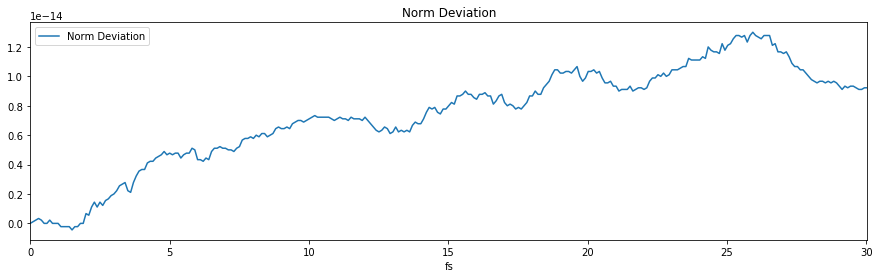

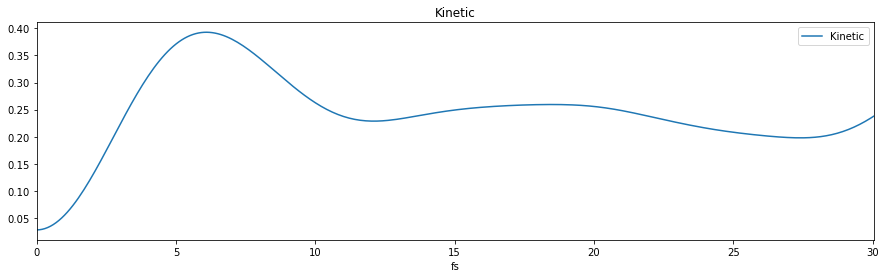

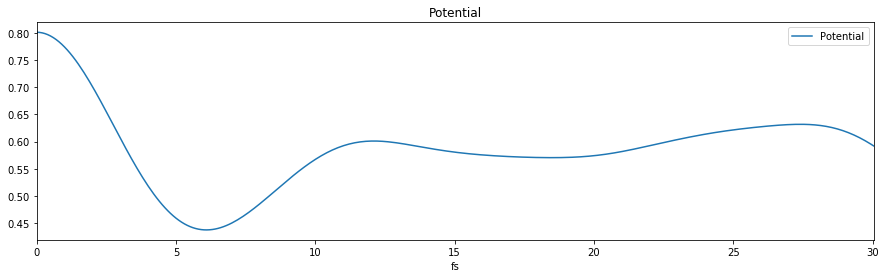

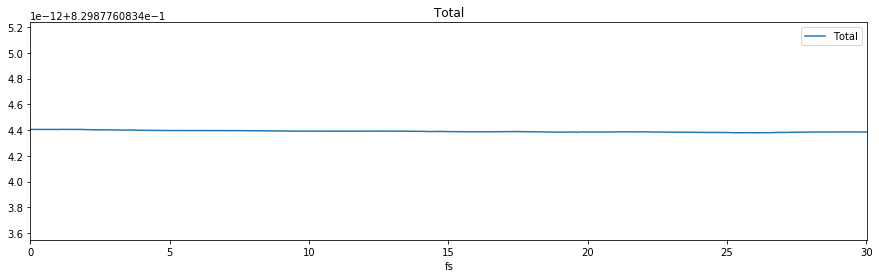

In [13]:
data.plot(title = 'Norm Deviation', x='fs', y = 'Norm Deviation', figsize=(15,4));
data.plot(title = 'Kinetic', x='fs', y = 'Kinetic', figsize=(15,4));
data.plot(title = 'Potential', x='fs', y = 'Potential', figsize=(15,4));
data.plot(title = 'Total', x='fs', y = 'Total', figsize=(15,4));

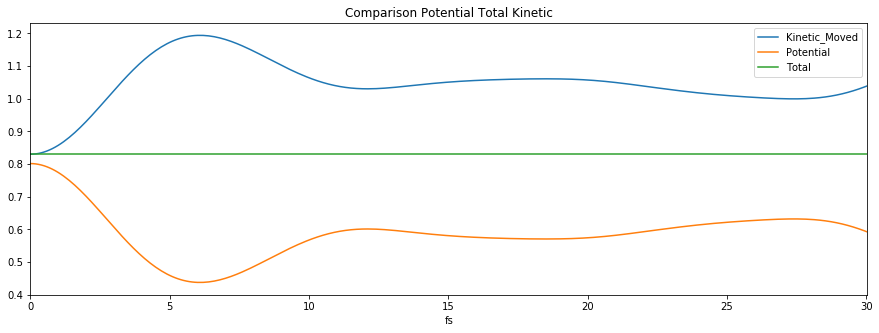

In [14]:
data['Kinetic_Moved'] = data['Kinetic'] + data['Potential'][0]
data.plot(title = 'Comparison Potential Total Kinetic', x=['fs'] ,y=['Kinetic_Moved','Potential','Total'], figsize=(15,5));

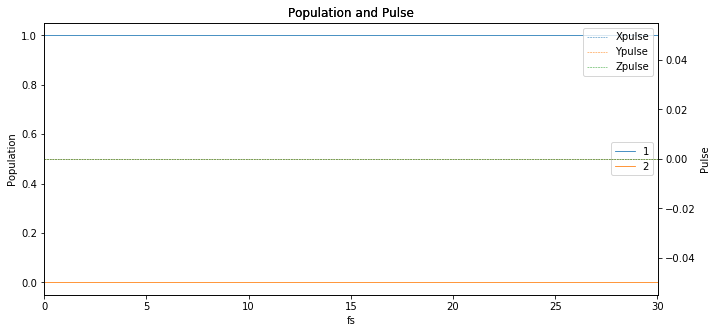

In [15]:
fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_ylabel('Population')
ax2.set_ylabel('Pulse')
popul = np.arange(nstates)+1
result.plot(title = 'Population and Pulse', ax = ax1,  x=['fs'] ,y=popul, linewidth=0.8)
result.plot(title = 'Population and Pulse', ax = ax2,  x=['fs'] ,y=['Xpulse','Ypulse','Zpulse'], linewidth=0.5,ls='--');

## Expected Value

In [16]:
def expected_1d(i):
    wf = allwf[i]
    time = alltime[i]
    print('  Time: {:5.2f} fs'.format(time))
    _,nstates = wf.shape
    for i in range(nstates):
        wfState = wf[:,i]
        popu = np.linalg.norm(wfState) # this is norm, the real popu is this squared
        if popu == 0:
            print('  Expected Values State {}:\n  Popul: {:10.3f} \n    {}: - \n'.format(i, popu**2,kind))
        else:
            wfA = abs2(wfState/popu)
            dimA = sum([ wfA[i] * dim[i] for i in range(wfA.size) ])
            print('  Expected Values State {}:\n  Popul: {:10.3f} \n    {}:   {:10.3f} \n'.format(i, popu**2, kind, dimA))

if interactive:
    interact(expected_1d, i = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV));
else:
    print('First Step:')
    expected_1d(0)
    print('Last Step:')
    expected_1d(lastV)

interactive(children=(IntSlider(value=300, description='i', max=300), Output()), _dom_classes=('widget-interac…

## Borders amplitudes

In [17]:
def border(i):
    left  = abs2(allwf[i,0])
    right = abs2(allwf[i,-1])
    print('Border Population:\nLeft  {}\nRight {}'.format(left,right))
    
if interactive:
    interact(border, i = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV));
else:
    print('First Step:')
    border(0)
    print('Last Step:')
    border(lastV)

interactive(children=(IntSlider(value=300, description='i', max=300), Output()), _dom_classes=('widget-interac…

In [18]:
%%bash -s "$kind"
jupyter nbconvert --to html Heatmaps1d.ipynb
mv Heatmaps1d.html ~/Desktop/$(date +"%m_%d_%Y-%H%M%S")_${1}_Heatmaps1d.html

[NbConvertApp] Converting notebook Heatmaps1d.ipynb to html
[NbConvertApp] Writing 488730 bytes to Heatmaps1d.html
